# boston HomePrice Using Lime(2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.datasets import load_boston

In [2]:
boston_dataset=load_boston()

E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func

In [3]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
boston['MEDV'] = boston_dataset.target

In [7]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [8]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


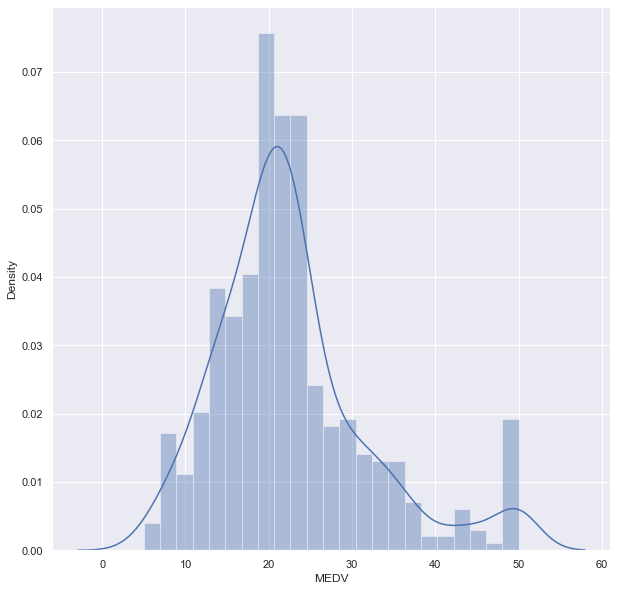

In [9]:
sns.set(rc={'figure.figsize':(10,10)})
sns.distplot(boston['MEDV'])
plt.show()

In [10]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
X1=boston[[	'CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']].values
y = boston['MEDV'].values
X1 = (X1 - np.mean(X1,axis=0)) / np.std(X1,axis=0)

In [12]:
X1

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [13]:
X2=boston[['CHAS']].values

In [14]:
X2

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [15]:
X=np.hstack((X1,X2))

In [16]:
X

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.        ],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937,  0.        ],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  0.        ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.        ],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163,  0.        ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833,  0.        ]])

In [17]:
df2=pd.DataFrame(X,columns=['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','CHAS'])
df2['y']=y
df2

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS,y
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.0,24.0
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,0.0,21.6
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,0.0,34.7
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,0.0,33.4
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,0.0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,0.0,22.4
502,-0.415249,-0.487722,0.115738,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,0.0,20.6
503,-0.413447,-0.487722,0.115738,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.0,23.9
504,-0.407764,-0.487722,0.115738,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,0.0,22.0


In [18]:
from sklearn import model_selection

In [19]:
X = df2[['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','CHAS']]
y = df2['y']

In [20]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [21]:
X_test

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS
64,-0.418247,0.263370,-1.423605,-1.197230,1.167316,-0.322709,2.580236,-0.752922,-1.141751,0.066796,0.400922,-0.645229,0.0
100,-0.403217,-0.487722,-0.375976,-0.299707,0.630220,0.402727,-0.483566,-0.523001,-0.143951,1.130230,0.417588,-0.453191,0.0
400,2.494178,-0.487722,1.015999,1.194724,-0.424027,1.117494,-1.048780,1.661245,1.530926,0.806576,0.441052,1.978824,0.0
485,0.006999,-0.487722,1.015999,0.244507,0.038987,-0.592969,0.093485,1.661245,1.530926,0.806576,0.350267,-0.290589,0.0
454,0.686614,-0.487722,1.015999,1.367490,0.631645,0.907687,-0.617477,1.661245,1.530926,0.806576,-3.837460,0.849024,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,-0.413289,1.229060,-1.442573,-1.085795,0.292576,-0.859673,2.375447,-0.982843,-0.434976,0.575395,0.441052,-0.935389,0.0
191,-0.412475,1.443658,-1.123032,-1.016689,0.647316,-1.343297,1.276251,-0.523001,-0.060801,-1.505237,0.362218,-1.116213,0.0
239,-0.409751,0.799865,-0.905627,-1.094434,0.457836,-0.937907,1.138441,-0.408041,-0.642851,-0.857929,0.297200,-0.740547,0.0
109,-0.389838,-0.487722,-0.375976,-0.299707,-0.079260,0.804561,-0.594184,-0.523001,-0.143951,1.130230,0.378884,0.406075,0.0


In [22]:
from sklearn.svm import SVR

In [23]:
linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train, y_train)
linear_svr_y_predict = linear_svr.predict(X_test)

In [24]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print (linear_svr.score(X_test, y_test))

0.7646714399761126


In [25]:
Adjusted_R2=1 - (1-linear_svr.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [26]:
Adjusted_R2

0.7299069936089475

# DO Lime

# perturb data

In [27]:
num_perturb = 500
X_limePart1 = np.random.normal(0,1,size=(num_perturb,X1.shape[1]))

In [28]:
X_limePart1

array([[-0.70545731,  0.84477633, -0.55560213, ..., -0.75487303,
         0.82256073,  0.24849349],
       [-0.75330834, -0.63105212,  1.5945648 , ..., -1.34797031,
         0.97432638,  0.20445162],
       [-1.97946531,  0.85185936,  0.00576119, ..., -1.3993403 ,
        -1.62682579,  1.69813199],
       ...,
       [ 0.14052529, -1.36236496, -0.85689731, ...,  1.94765249,
         0.20644664, -0.25009906],
       [ 0.68254216, -2.34818712, -1.46686928, ..., -0.50358283,
        -1.4870352 , -0.25652349],
       [-0.72361358, -1.10755539,  1.0350611 , ..., -1.02492553,
         0.80550011,  1.27225754]])

In [29]:
dfX_limePart1=pd.DataFrame(X_limePart1,columns=['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])

In [30]:
dfX_limePart1

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.705457,0.844776,-0.555602,0.312159,1.183157,0.249170,-0.669223,0.734646,0.727300,-0.754873,0.822561,0.248493
1,-0.753308,-0.631052,1.594565,0.587604,-0.159383,-2.453100,-0.644064,0.503302,-0.226502,-1.347970,0.974326,0.204452
2,-1.979465,0.851859,0.005761,-0.531571,-0.149929,1.810933,-1.786157,0.086744,-0.505786,-1.399340,-1.626826,1.698132
3,0.279295,-0.237316,-0.555606,-0.549176,-0.813408,-0.964785,-0.827820,2.042375,-0.294554,-1.065063,-0.948865,1.003701
4,0.945746,-0.327040,-1.131819,0.715719,0.413103,1.199519,-1.112148,-0.237990,0.497892,0.914177,-0.834866,-0.853039
...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.757461,-0.574198,-1.065424,-2.662814,-0.568608,0.021229,-0.053942,-0.352750,0.886205,0.874418,0.374729,0.843062
496,1.460516,0.353296,-0.937746,-0.350304,0.271971,0.277279,0.547189,-0.185624,-0.578371,0.246773,0.103112,0.411997
497,0.140525,-1.362365,-0.856897,0.985871,-0.855341,-1.568520,-0.496656,-1.097455,0.822994,1.947652,0.206447,-0.250099
498,0.682542,-2.348187,-1.466869,0.722494,-0.205289,-0.143667,-1.662358,-0.393084,0.307820,-0.503583,-1.487035,-0.256523


In [31]:
boston['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [32]:
perturbations=[]
for i in range(num_perturb):
  perturbations.append(np.random.choice(2,1,p=[0.93,0.07]))

In [33]:
perturbations

[array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),

In [34]:
LimePart2=pd.DataFrame(perturbations,columns=['CHAS'])
LimePart2

,CHAS
0,0
1,0
2,0
3,0
4,0
...,...
495,0
496,0
497,0
498,0


In [35]:
result = pd.concat([dfX_limePart1, LimePart2], axis=1)
result

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS
0,-0.705457,0.844776,-0.555602,0.312159,1.183157,0.249170,-0.669223,0.734646,0.727300,-0.754873,0.822561,0.248493,0
1,-0.753308,-0.631052,1.594565,0.587604,-0.159383,-2.453100,-0.644064,0.503302,-0.226502,-1.347970,0.974326,0.204452,0
2,-1.979465,0.851859,0.005761,-0.531571,-0.149929,1.810933,-1.786157,0.086744,-0.505786,-1.399340,-1.626826,1.698132,0
3,0.279295,-0.237316,-0.555606,-0.549176,-0.813408,-0.964785,-0.827820,2.042375,-0.294554,-1.065063,-0.948865,1.003701,0
4,0.945746,-0.327040,-1.131819,0.715719,0.413103,1.199519,-1.112148,-0.237990,0.497892,0.914177,-0.834866,-0.853039,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.757461,-0.574198,-1.065424,-2.662814,-0.568608,0.021229,-0.053942,-0.352750,0.886205,0.874418,0.374729,0.843062,0
496,1.460516,0.353296,-0.937746,-0.350304,0.271971,0.277279,0.547189,-0.185624,-0.578371,0.246773,0.103112,0.411997,0
497,0.140525,-1.362365,-0.856897,0.985871,-0.855341,-1.568520,-0.496656,-1.097455,0.822994,1.947652,0.206447,-0.250099,0
498,0.682542,-2.348187,-1.466869,0.722494,-0.205289,-0.143667,-1.662358,-0.393084,0.307820,-0.503583,-1.487035,-0.256523,0


# repass SVM Model

In [36]:
linear_svr_y_predict2 = linear_svr.predict(result)

# Sample weight

In [37]:
original_data=np.array(X_test.iloc[6])

In [38]:
original_data

array([-0.40616976, -0.48772236, -0.16440754, -0.06647246, -0.52945215,
        0.86501442, -0.68531244, -0.40804109,  0.14113426, -0.30309415,
        0.41967143,  0.49858928,  0.        ])

In [39]:
original_data.reshape(1,13)

array([[-0.40616976, -0.48772236, -0.16440754, -0.06647246, -0.52945215,
         0.86501442, -0.68531244, -0.40804109,  0.14113426, -0.30309415,
         0.41967143,  0.49858928,  0.        ]])

In [40]:
import sklearn
import sklearn.metrics

In [41]:
distances = sklearn.metrics.pairwise_distances(result.values,original_data.reshape(1,13), metric='cosine').ravel()

In [42]:
print(distances)

[0.87486094 1.10114216 0.46903207 1.02997201 0.8689296  0.79412128
 0.62874324 0.98674142 0.64551912 0.93200175 0.71677286 1.40693766
 0.84130455 0.92446063 0.72695482 0.8848153  1.15106826 0.89316928
 0.53055807 0.382577   0.85801888 1.50107328 0.7942866  0.50446122
 0.88983273 1.00746463 0.70389788 0.763239   0.91840293 0.43263034
 0.80164771 1.0557952  0.80329637 1.13456253 0.34746712 0.50830215
 0.94624562 1.29269103 1.1598081  1.24643973 0.5128651  0.95813915
 0.76235513 1.17329733 0.67958588 1.05054885 0.76339729 1.55921946
 1.36025468 1.057119   1.03039057 0.89707424 1.00801014 1.10796406
 1.10943467 1.07173969 0.85814688 0.90748336 0.50003571 0.7684115
 0.80562954 0.71785286 0.8050029  1.02672799 0.61349447 0.89066413
 1.11536202 1.03469462 0.8798255  1.35417188 1.09737875 1.08803394
 1.00787602 0.78819598 0.87209736 1.00517581 0.88895071 1.16455304
 0.99850979 0.71028305 1.38204351 0.73705197 0.87565341 1.53953201
 1.01115658 1.155295   0.3412668  1.50966028 0.9191673  1.32488

In [43]:
distances.shape

(500,)

In [44]:
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
print(weights)

[2.19175368e-03 6.12766025e-05 1.72057133e-01 2.06184583e-04
 2.38082269e-03 6.44127451e-03 4.23179264e-02 4.14155533e-04
 3.56659281e-02 9.59576850e-04 1.64060237e-02 1.32618593e-07
 3.47435401e-03 1.07329738e-03 1.45858056e-02 1.90516821e-03
 2.49243534e-05 1.69171772e-03 1.05195486e-01 3.10081129e-01
 2.76816352e-03 1.48425480e-08 6.42775746e-03 1.30569581e-01
 1.77417749e-03 2.97564406e-04 1.89912327e-02 9.46390535e-03
 1.17356213e-03 2.23721765e-01 5.85117720e-03 1.34005723e-04
 5.72862101e-03 3.37052426e-05 3.80652960e-01 1.26568885e-01
 7.74691101e-04 1.56378606e-06 2.12057408e-05 4.00128084e-06
 1.21937712e-01 6.46301069e-04 9.56654911e-03 1.64857697e-05
 2.48550148e-02 1.46391923e-04 9.44562663e-03 3.57492161e-09
 3.72755766e-07 1.31040438e-04 2.04767000e-04 1.59970260e-03
 2.94958588e-04 5.43169118e-05 5.29182493e-05 1.02156184e-04
 2.76330314e-03 1.37650401e-03 1.35296624e-01 8.88269844e-03
 5.55914135e-03 1.62039248e-02 5.60420893e-03 2.17488859e-04
 4.92422267e-02 1.753290

In [45]:
weights.shape

(500,)

# train lime model

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
simpler_model = LinearRegression()
simpler_model.fit(X=result, y=linear_svr_y_predict2, sample_weight=weights)

LinearRegression()

In [48]:
simpler_model.coef_

array([-1.07128885,  0.68816245,  0.0127086 , -1.21943721,  3.10034098,
       -1.00807006, -2.53183207,  1.51423997, -1.74181608, -1.72860714,
        1.07774621, -2.04799263,  1.86498494])

In [49]:
simpler_model.coef_2=abs(simpler_model.coef_)

In [50]:
feature_nameintxt=['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','CHAS']
featurecoef=zip(feature_nameintxt,simpler_model.coef_2)
featurecoef1=dict(featurecoef)

In [51]:
print(sorted(featurecoef1.keys()))

['AGE', 'B', 'CHAS', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD', 'RM', 'TAX', 'ZN']


In [52]:
sorted(featurecoef1.items(),key=lambda kv:(kv[1], kv[0]))

[('INDUS', 0.012708603499658409),
 ('ZN', 0.6881624519521549),
 ('AGE', 1.0080700556325242),
 ('CRIM', 1.0712888507486313),
 ('B', 1.077746212061831),
 ('NOX', 1.21943720832222),
 ('RAD', 1.5142399705577747),
 ('PTRATIO', 1.7286071369174396),
 ('TAX', 1.7418160811568557),
 ('CHAS', 1.8649849425824423),
 ('LSTAT', 2.0479926267282975),
 ('DIS', 2.5318320746043104),
 ('RM', 3.100340979316506)]

# Train LimeTree

In [53]:
from sklearn import tree

In [54]:
treemodel=tree.DecisionTreeRegressor(max_depth=5)
treemodel.fit(result,linear_svr_y_predict2,sample_weight=weights)

DecisionTreeRegressor(max_depth=5)

In [55]:
importances = treemodel.feature_importances_

In [56]:
importances

array([8.30501791e-02, 0.00000000e+00, 0.00000000e+00, 3.10370565e-02,
       4.47673887e-01, 0.00000000e+00, 1.32171131e-01, 2.87053001e-02,
       3.85915287e-03, 2.22240236e-01, 2.83934209e-05, 5.12346640e-02,
       0.00000000e+00])

In [57]:
feature_nameintxt1=['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','CHAS']
featureimportances=zip(feature_nameintxt1,importances)
featureimportances1=dict(featureimportances)

In [58]:
print(sorted(featureimportances1.keys()))

['AGE', 'B', 'CHAS', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD', 'RM', 'TAX', 'ZN']


In [59]:
sorted(featureimportances1.items(),key=lambda kv:(kv[1], kv[0]))

[('AGE', 0.0),
 ('CHAS', 0.0),
 ('INDUS', 0.0),
 ('ZN', 0.0),
 ('B', 2.8393420897472092e-05),
 ('TAX', 0.003859152872897949),
 ('RAD', 0.028705300119807844),
 ('NOX', 0.031037056542537557),
 ('LSTAT', 0.051234663982160054),
 ('CRIM', 0.08305017914265997),
 ('DIS', 0.13217113093652216),
 ('PTRATIO', 0.22224023596176495),
 ('RM', 0.44767388702075217)]

# Train LimeRandomforest

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
regr_rf=RandomForestRegressor(max_depth=5)
regr_rf.fit(X=result, y=linear_svr_y_predict2,sample_weight=weights)

RandomForestRegressor(max_depth=5)

In [62]:
importances2 = regr_rf.feature_importances_

In [63]:
importances2 

array([2.52274978e-02, 1.03186764e-02, 1.10564776e-02, 5.13847386e-02,
       3.98585852e-01, 2.97308053e-02, 1.54375433e-01, 3.85836506e-02,
       7.60718999e-02, 1.21159870e-01, 3.29091030e-02, 5.04628626e-02,
       1.33132432e-04])

In [64]:
feature_nameintxt2=['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','CHAS']
featureimportances2=zip(feature_nameintxt2,importances2)
featureimportances3=dict(featureimportances2)

In [65]:
print(sorted(featureimportances3.keys()))

['AGE', 'B', 'CHAS', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD', 'RM', 'TAX', 'ZN']


In [66]:
sorted(featureimportances3.items(),key=lambda kv:(kv[1], kv[0]))

[('CHAS', 0.00013313243207002288),
 ('ZN', 0.010318676426180598),
 ('INDUS', 0.011056477629874991),
 ('CRIM', 0.025227497769275624),
 ('AGE', 0.029730805293773716),
 ('B', 0.03290910297344531),
 ('RAD', 0.0385836506427234),
 ('LSTAT', 0.05046286264801062),
 ('NOX', 0.051384738572850565),
 ('TAX', 0.07607189988258184),
 ('PTRATIO', 0.12115987042417449),
 ('DIS', 0.1543754333064127),
 ('RM', 0.39858585199862634)]

# Train XGB Model

In [67]:
import xgboost as xgb

xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(result,linear_svr_y_predict2,sample_weight=weights)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [68]:
importances3=xgbrModel.feature_importances_
importances3

array([0.04074613, 0.01133534, 0.01239175, 0.023091  , 0.24878776,
       0.06806074, 0.06365434, 0.04401468, 0.12448002, 0.20544131,
       0.07195423, 0.08604266, 0.        ], dtype=float32)

In [69]:
feature_nameintxt3=['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','CHAS']
featureimportances3=zip(feature_nameintxt3,importances3)
featureimportances4=dict(featureimportances3)

In [70]:
print(sorted(featureimportances4.keys()))

['AGE', 'B', 'CHAS', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD', 'RM', 'TAX', 'ZN']


In [71]:
sorted(featureimportances4.items(),key=lambda kv:(kv[1], kv[0]))

[('CHAS', 0.0),
 ('ZN', 0.01133534),
 ('INDUS', 0.012391753),
 ('NOX', 0.023090998),
 ('CRIM', 0.04074613),
 ('RAD', 0.044014677),
 ('DIS', 0.06365434),
 ('AGE', 0.06806074),
 ('B', 0.07195423),
 ('LSTAT', 0.086042665),
 ('TAX', 0.124480024),
 ('PTRATIO', 0.20544131),
 ('RM', 0.24878776)]

# NUM=1000 Lime model

In [72]:
d = {'CRIM' : 109.2714628, 'ZN' : 70.1925701,'INDUS':1.27086035,'NOX':124.3825952,'RM':316.2347799,'DIS':258.2468716,'RAD':154.452477,'TAX':177.6552403,'PTRATIO':176.317928,'B':109.9301136,'LSTAT':208.8952479,'CHAS':190.2284641 }

In [73]:
d

{'CRIM': 109.2714628,
 'ZN': 70.1925701,
 'INDUS': 1.27086035,
 'NOX': 124.3825952,
 'RM': 316.2347799,
 'DIS': 258.2468716,
 'RAD': 154.452477,
 'TAX': 177.6552403,
 'PTRATIO': 176.317928,
 'B': 109.9301136,
 'LSTAT': 208.8952479,
 'CHAS': 190.2284641}

In [74]:
sorted(d.items(),key=lambda kv:(kv[1], kv[0]))

[('INDUS', 1.27086035),
 ('ZN', 70.1925701),
 ('CRIM', 109.2714628),
 ('B', 109.9301136),
 ('NOX', 124.3825952),
 ('RAD', 154.452477),
 ('PTRATIO', 176.317928),
 ('TAX', 177.6552403),
 ('CHAS', 190.2284641),
 ('LSTAT', 208.8952479),
 ('DIS', 258.2468716),
 ('RM', 316.2347799)]

# When numpurb=1000 svm model  Choose future=11

In [75]:
X5 = df2[['RM','DIS','LSTAT','CHAS','TAX','PTRATIO','RAD','NOX','B','CRIM','ZN']]
y5= df2['y']

In [76]:
X5_train, X5_test, y5_train, y5_test = model_selection.train_test_split(X5, y5, test_size = 0.2, random_state = 1234)

In [77]:
linear_svr=SVR(kernel='linear')
linear_svr.fit(X5_train,y5_train)
linear_svr_y_predict=linear_svr.predict(X5_test)

In [78]:
print(linear_svr.score(X5_test,y5_test))

0.7706585886598272


In [79]:
Adjusted_R2=1 - (1-linear_svr.score(X5_test, y5_test))*(len(y5_test)-1)/(len(y5_test)-X5_test.shape[1]-1)

In [80]:
Adjusted_R2

0.7426279717182505

# When num=1000 svm model  Choose future=10

In [81]:
X6 = df2[['RM','DIS','LSTAT','CHAS','TAX','PTRATIO','RAD','NOX','B','CRIM']]
y6= df2['y']

In [82]:
X6_train, X6_test, y6_train, y6_test = model_selection.train_test_split(X6, y6, test_size = 0.2, random_state = 1234)

In [83]:
linear_svr=SVR(kernel='linear')
linear_svr.fit(X6_train,y6_train)
linear_svr_y_predict=linear_svr.predict(X6_test)

In [84]:
print(linear_svr.score(X6_test,y6_test))

0.7722886835945162


In [85]:
Adjusted_R2=1 - (1-linear_svr.score(X6_test, y6_test))*(len(y6_test)-1)/(len(y6_test)-X6_test.shape[1]-1)

In [86]:
Adjusted_R2

0.747265462011496

# When num=1000 svm model  Choose future=9

In [87]:
X7 = df2[['RM','DIS','LSTAT','CHAS','TAX','PTRATIO','RAD','NOX','B','CRIM']]
y7= df2['y']

In [88]:
X7_train, X7_test, y7_train, y7_test = model_selection.train_test_split(X7, y7, test_size = 0.2, random_state = 1234)

In [89]:
linear_svr=SVR(kernel='linear')
linear_svr.fit(X7_train,y7_train)
linear_svr_y_predict=linear_svr.predict(X7_test)

In [90]:
print(linear_svr.score(X7_test,y7_test))

0.7722886835945162


In [91]:
Adjusted_R2=1 - (1-linear_svr.score(X7_test, y7_test))*(len(y7_test)-1)/(len(y7_test)-X7_test.shape[1]-1)

In [92]:
Adjusted_R2

0.747265462011496

# When num=1000 svm model  Choose future=8

In [93]:
X1 = df2[['RM','DIS','LSTAT','CHAS','TAX','PTRATIO','RAD','NOX']]
y1= df2['y']

In [94]:
X1_train, X1_test, y1_train, y1_test = model_selection.train_test_split(X1, y1, test_size = 0.2, random_state = 1234)

In [95]:
linear_svr=SVR(kernel='linear')
linear_svr.fit(X1_train,y1_train)
linear_svr_y_predict=linear_svr.predict(X1_test)

In [96]:
print(linear_svr.score(X1_test,y1_test))

0.7653467831772638


In [97]:
Adjusted_R2=1 - (1-linear_svr.score(X1_test, y1_test))*(len(y1_test)-1)/(len(y1_test)-X1_test.shape[1]-1)

In [98]:
Adjusted_R2

0.7451615602247703

# When num=1000 svm model  Choose future=7

In [99]:
X2 = df2[['RM','DIS','LSTAT','CHAS','TAX','PTRATIO','RAD']]
y2= df2['y']

In [100]:
X2_train, X2_test, y2_train, y2_test = model_selection.train_test_split(X2, y2, test_size = 0.2, random_state = 1234)

In [101]:
linear_svr=SVR(kernel='linear')
linear_svr.fit(X2_train,y2_train)
linear_svr_y_predict=linear_svr.predict(X2_test)

In [102]:
print(linear_svr.score(X2_test,y2_test))

0.7764906308541983


In [103]:
Adjusted_R2=1 - (1-linear_svr.score(X2_test, y2_test))*(len(y2_test)-1)/(len(y2_test)-X2_test.shape[1]-1)

In [104]:
Adjusted_R2

0.7598463161305749

# When num=1000 svm model  Choose future=6

In [105]:
X3 = df2[['RM','DIS','LSTAT','CHAS','TAX','PTRATIO']]
y3= df2['y']

In [106]:
X3_train, X3_test, y3_train, y3_test = model_selection.train_test_split(X3, y3, test_size = 0.2, random_state = 1234)

In [107]:
linear_svr=SVR(kernel='linear')
linear_svr.fit(X3_train,y3_train)
linear_svr_y_predict=linear_svr.predict(X3_test)

In [108]:
print(linear_svr.score(X3_test,y3_test))

0.7762662874400335


In [109]:
Adjusted_R2=1 - (1-linear_svr.score(X3_test, y3_test))*(len(y3_test)-1)/(len(y3_test)-X3_test.shape[1]-1)

In [110]:
Adjusted_R2

0.7621357371730881

# When num=1000 svm model  Choose future=5

In [111]:
X4 = df2[['RM','DIS','LSTAT','CHAS','TAX']]
y4= df2['y']

In [112]:
X4_train, X4_test, y4_train, y4_test = model_selection.train_test_split(X4, y4, test_size = 0.2, random_state = 1234)

In [113]:
linear_svr=SVR(kernel='linear')
linear_svr.fit(X4_train,y4_train)
linear_svr_y_predict=linear_svr.predict(X4_test)

In [114]:
print(linear_svr.score(X4_test,y4_test))

0.7588526601956682


In [115]:
Adjusted_R2=1 - (1-linear_svr.score(X4_test, y4_test))*(len(y4_test)-1)/(len(y4_test)-X4_test.shape[1]-1)

In [116]:
Adjusted_R2

0.7462929029141926

# When num=1000 svm model  Choose future=4

In [117]:
X8 = df2[['RM','DIS','LSTAT','CHAS']]
y8= df2['y']

In [118]:
X8_train, X8_test, y8_train, y8_test = model_selection.train_test_split(X8, y8, test_size = 0.2, random_state = 1234)

In [119]:
linear_svr=SVR(kernel='linear')
linear_svr.fit(X8_train,y8_train)
linear_svr_y_predict=linear_svr.predict(X8_test)

In [120]:
print(linear_svr.score(X8_test,y8_test))

0.7361431520341368


In [121]:
Adjusted_R2=1 - (1-linear_svr.score(X8_test, y8_test))*(len(y8_test)-1)/(len(y8_test)-X8_test.shape[1]-1)

In [122]:
Adjusted_R2

0.7252624572726579

# When num=1000 svm model  Choose future=3

In [123]:
X9= df2[['RM','DIS','LSTAT']]
y9= df2['y']

In [124]:
X9_train, X9_test, y9_train, y9_test = model_selection.train_test_split(X9, y9, test_size = 0.2, random_state = 1234)

In [125]:
linear_svr=SVR(kernel='linear')
linear_svr.fit(X9_train,y9_train)
linear_svr_y_predict=linear_svr.predict(X9_test)

In [126]:
print(linear_svr.score(X9_test,y9_test))

0.7424694364585938


In [127]:
Adjusted_R2=1 - (1-linear_svr.score(X9_test, y9_test))*(len(y9_test)-1)/(len(y9_test)-X9_test.shape[1]-1)

In [128]:
Adjusted_R2

0.7345858477787548

# When num=1000 svm model  Choose future=2

In [129]:
X10= df2[['RM','DIS']]
y10= df2['y']

In [130]:
X10_train, X10_test, y10_train, y10_test = model_selection.train_test_split(X10, y10, test_size = 0.2, random_state = 1234)

In [131]:
linear_svr=SVR(kernel='linear')
linear_svr.fit(X10_train,y10_train)
linear_svr_y_predict=linear_svr.predict(X10_test)

In [132]:
print(linear_svr.score(X10_test,y10_test))

0.6829795722831487


In [133]:
Adjusted_R2=1 - (1-linear_svr.score(X10_test, y10_test))*(len(y10_test)-1)/(len(y10_test)-X10_test.shape[1]-1)

In [134]:
Adjusted_R2

0.6765751191979598

# NUM=1000 Lime tree model

In [135]:
p = {'CRIM' : 3.068858592, 'ZN' : 1.595615433,'INDUS':0.750804129,'NOX':3.112740861,'RM':35.54483943,'DIS':21.11541346,'RAD':4.873859735,'TAX':7.124461371,'PTRATIO':6.765772904,'B':2.871624168,'LSTAT':12.69977917,'CHAS':0.146721347 }

In [136]:
p

{'CRIM': 3.068858592,
 'ZN': 1.595615433,
 'INDUS': 0.750804129,
 'NOX': 3.112740861,
 'RM': 35.54483943,
 'DIS': 21.11541346,
 'RAD': 4.873859735,
 'TAX': 7.124461371,
 'PTRATIO': 6.765772904,
 'B': 2.871624168,
 'LSTAT': 12.69977917,
 'CHAS': 0.146721347}

In [183]:
d

{'CRIM': 109.2714628,
 'ZN': 70.1925701,
 'INDUS': 1.27086035,
 'NOX': 124.3825952,
 'RM': 316.2347799,
 'DIS': 258.2468716,
 'RAD': 154.452477,
 'TAX': 177.6552403,
 'PTRATIO': 176.317928,
 'B': 109.9301136,
 'LSTAT': 208.8952479,
 'CHAS': 190.2284641}

In [137]:
sorted(d.items(),key=lambda kv:(kv[1], kv[0]))

[('INDUS', 1.27086035),
 ('ZN', 70.1925701),
 ('CRIM', 109.2714628),
 ('B', 109.9301136),
 ('NOX', 124.3825952),
 ('RAD', 154.452477),
 ('PTRATIO', 176.317928),
 ('TAX', 177.6552403),
 ('CHAS', 190.2284641),
 ('LSTAT', 208.8952479),
 ('DIS', 258.2468716),
 ('RM', 316.2347799)]

# When num=1000 svm model  Choose future=11

In [138]:
X11=df2[['RM','DIS','LSTAT','CHAS','TAX','PTRATIO','RAD','NOX','B','CRIM','ZN']]
y11=df2['y']

In [189]:
X11_train, X11_test, y11_train, y11_test = model_selection.train_test_split(X11, y11, test_size = 0.2, random_state = 800)

In [190]:
linear_svr=SVR(kernel='linear')
linear_svr.fit(X11_train,y11_train)
linear_svr_y_predict=linear_svr.predict(X11_test)

In [191]:
print(linear_svr.score(X11_test,y11_test))

0.8102100068607868


In [192]:
Adjusted_R2=1 - (1-linear_svr.score(X11_test, y11_test))*(len(y11_test)-1)/(len(y11_test)-X11_test.shape[1]-1)

In [193]:
Adjusted_R2

0.7893539636586755

# When num=1000 svm model  Choose future=10

In [194]:
X12=df2[['RM','DIS','LSTAT','CHAS','TAX','PTRATIO','RAD','NOX','B','CRIM']]
y12=df2['y']

In [200]:
X12_train, X12_test, y12_train, y12_test = model_selection.train_test_split(X12, y12, test_size = 0.2, random_state = 800)

In [201]:
linear_svr=SVR(kernel='linear')
linear_svr.fit(X12_train,y12_train)
linear_svr_y_predict=linear_svr.predict(X12_test)

In [202]:
print(linear_svr.score(X12_test,y12_test))

0.8102100068607868


In [203]:
Adjusted_R2=1 - (1-linear_svr.score(X12_test, y12_test))*(len(y12_test)-1)/(len(y12_test)-X12_test.shape[1]-1)

In [204]:
Adjusted_R2

0.7893539636586755

# When num=1000 svm model  Choose future=9

In [245]:
X13=df2[['RM','DIS']]
y13=df2['y']

In [246]:
X13_train, X13_test, y13_train, y13_test = model_selection.train_test_split(X13, y13, test_size = 0.2, random_state = 800)

In [247]:
linear_svr=SVR(kernel='linear')
linear_svr.fit(X13_train,y13_train)
linear_svr_y_predict=linear_svr.predict(X13_test)

In [248]:
Adjusted_R2=1 - (1-linear_svr.score(X13_test, y13_test))*(len(y13_test)-1)/(len(y13_test)-X13_test.shape[1]-1)

In [249]:
Adjusted_R2

0.6838795027135375